## Assignment for ggplot2
For this optional assignment we will be recreating this plot from [The Economist](https://www.economist.com/graphic-detail/2011/12/02/corrosive-corruption):

![image](Economist1.png)

Feel free to work throughas little or as much as you want. We haven't covered everything that you will need to reproduce this plot, but we have covered the skills needed for you to find and learn what you need from the documentation. Best of luck and have fun!

### What to do
- This assignment will be very challenging! You will recreate this plot by following the steps outlined in bold below. You will need to reference documentation! There are things in this plot that we have purposefully not covered to test your skills in going to the documentation and referencing what you need to know. Links and hints will be provided to along the way!

### Let's get started!
#### Import the ggplot2 data.table libraries and use fread to load the csv file 'Economist_Assignment_Data.csv' into a dataframe called df (Hint: use drop=1 to skip the first column)

In [33]:
library(ggplot2)
library(data.table)

df <- fread("Economist_Assignment_Data.csv", drop = 1)

#### Check the head of df

In [34]:
head(df)

Country,HDI.Rank,HDI,CPI,Region
<chr>,<int>,<dbl>,<dbl>,<chr>
Afghanistan,172,0.398,1.5,Asia Pacific
Albania,70,0.739,3.1,East EU Cemt Asia
Algeria,96,0.698,2.9,MENA
Angola,148,0.486,2.0,SSA
Argentina,45,0.797,3.0,Americas
Armenia,86,0.716,2.6,East EU Cemt Asia


#### Use ggplot() + geom_point() to create a scatter plot object called pl. You will need to specify x=CPI and y=HDI and color=Region as aesthetics

In [6]:
pl <- ggplot(df, aes(CPI, HDI, color = Region)) +
  geom_point()

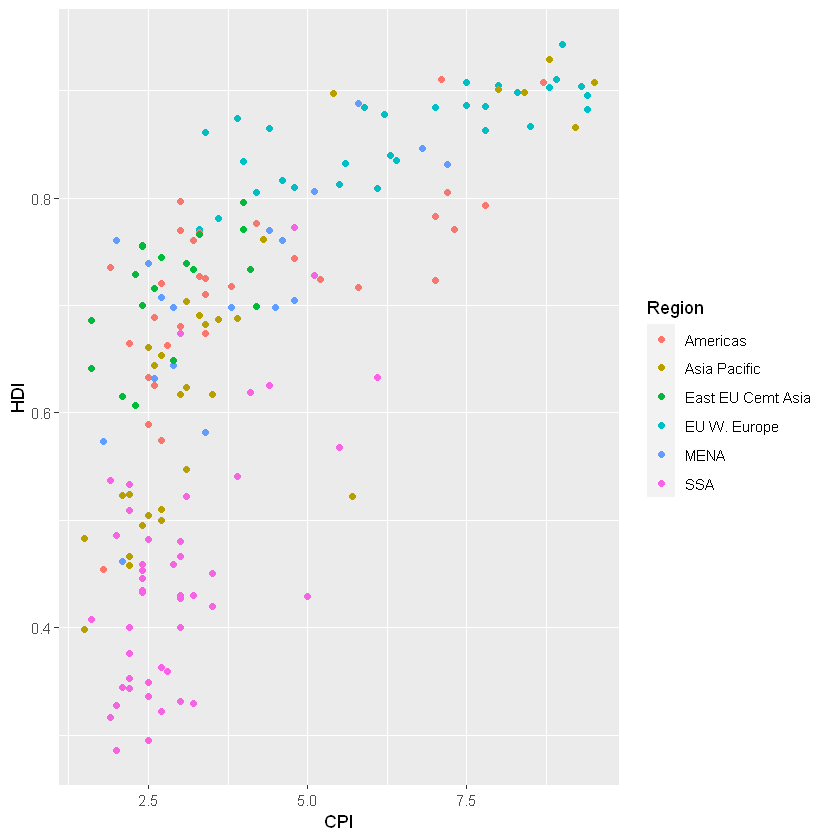

In [7]:
pl

#### Change the points to be larger empty circles. (You'll have to go back and add arguments to geom_point() and reassign it to pl.) You'll need to figure out what shape= and size=

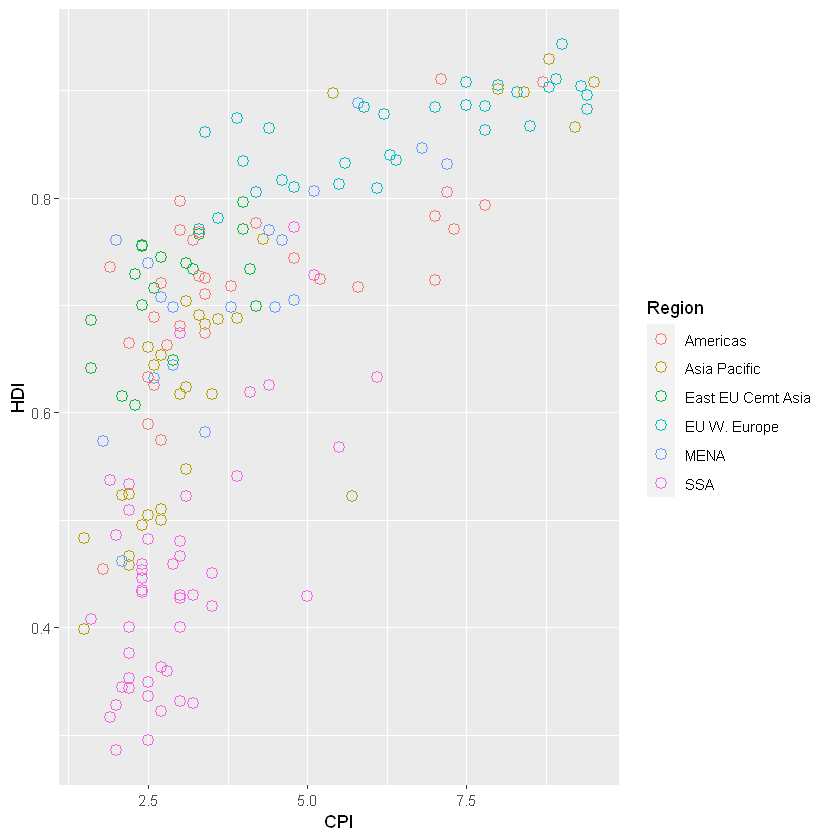

In [8]:
pl <- ggplot(df, aes(CPI, HDI, color = Region)) +
  geom_point(shape = 1, size = 3)
pl

#### Add geom_smooth(aes(group=1)) to add a trend line

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



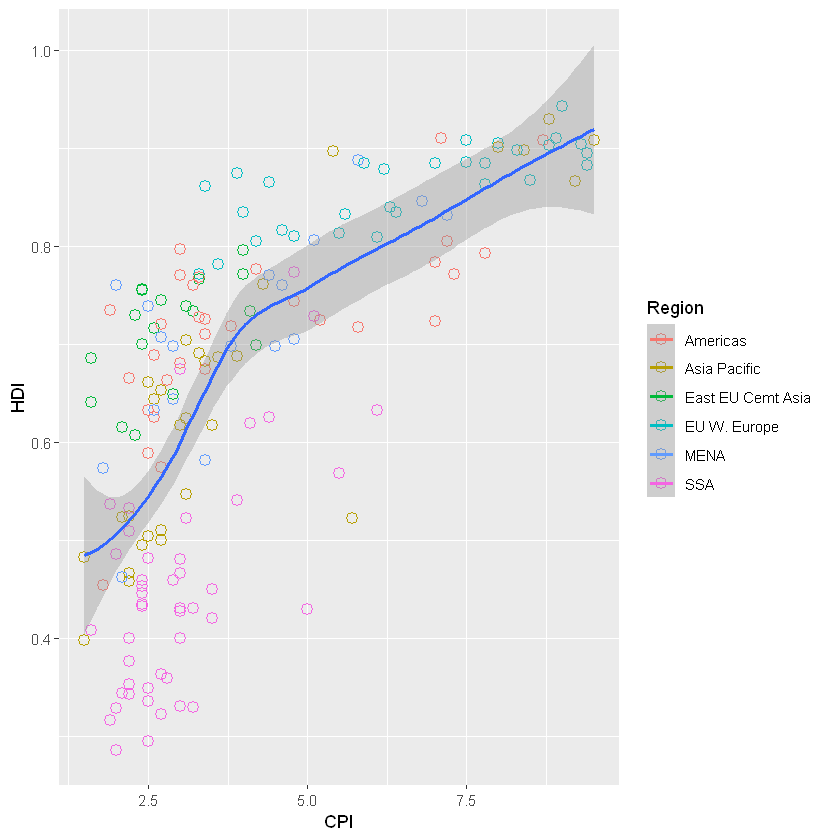

In [9]:
pl + geom_smooth(aes(group=1))

#### We want to further edit this trend line. Add the following arguments to geom_smooth (outside of aes):

- method = 'lm'
- formula = y ~ log(x)
- se = FALSE
- color = 'red'

#### For more info on these arguments, check out the documentation under the Arguments list for details.

#### Assign all of this to pl2

In [10]:
pl2 <- pl + geom_smooth(aes(group=1), method = "lm",
                        formula = y ~ log(x),
                        se = F, color = "red")

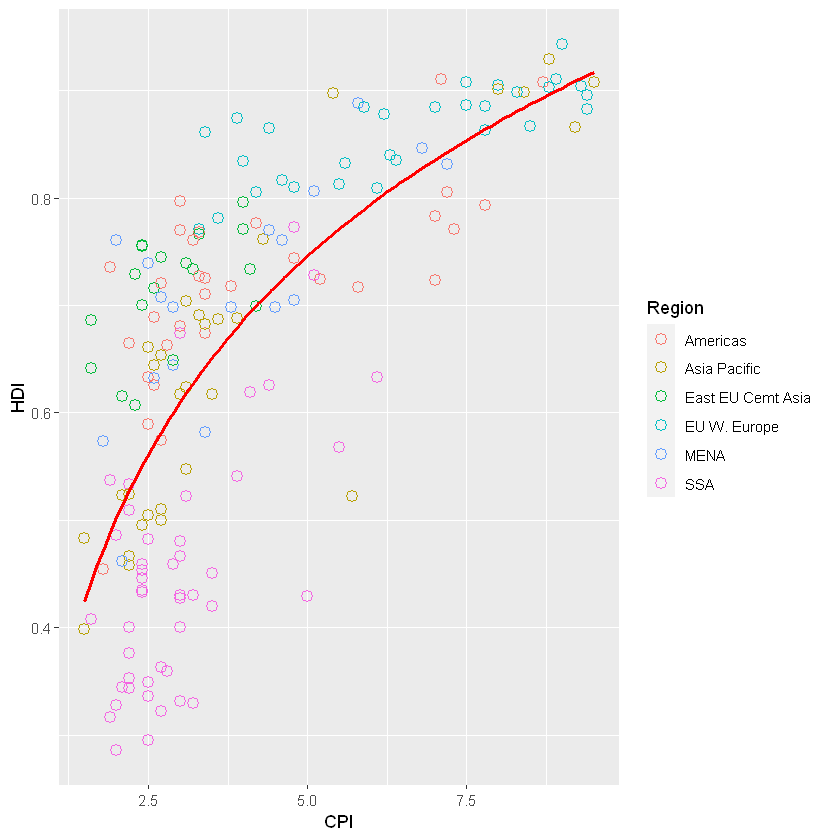

In [11]:
pl2

#### It's really starting to look similar! But we still need to add labels, we can use geom_text! Add geom_text(aes(label=Country)) to pl2 and see what happens. (Hint: It should be way too many labels)

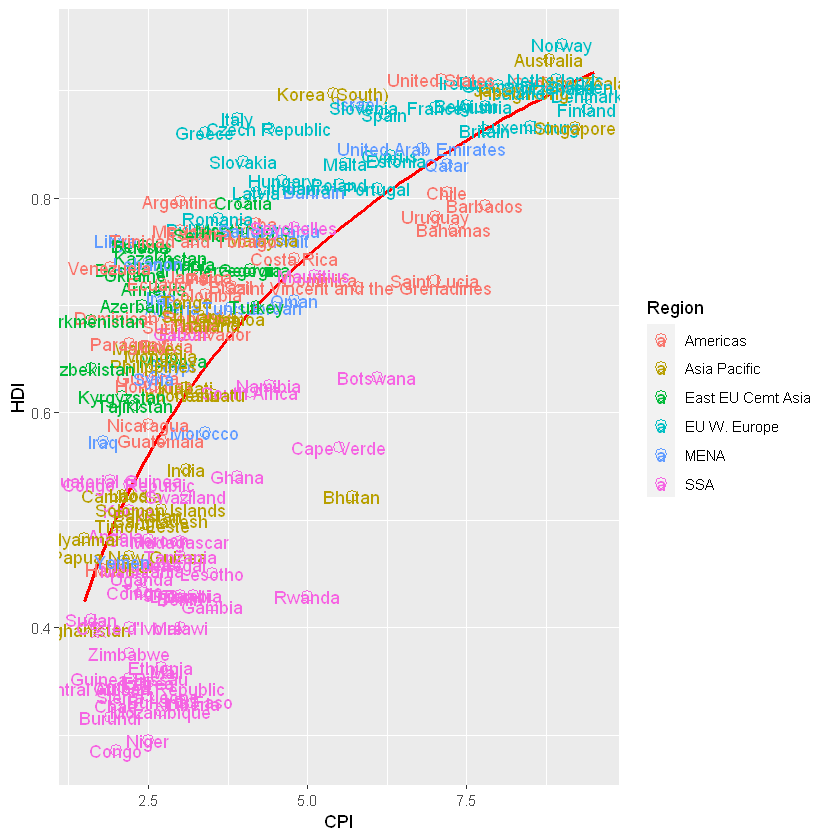

In [12]:
pl2 + geom_text(aes(label=Country))

#### Labeling a subset is actually pretty tricky! So we're just going to give you the answer since it would require manually selecting the subset of countries we want to label!

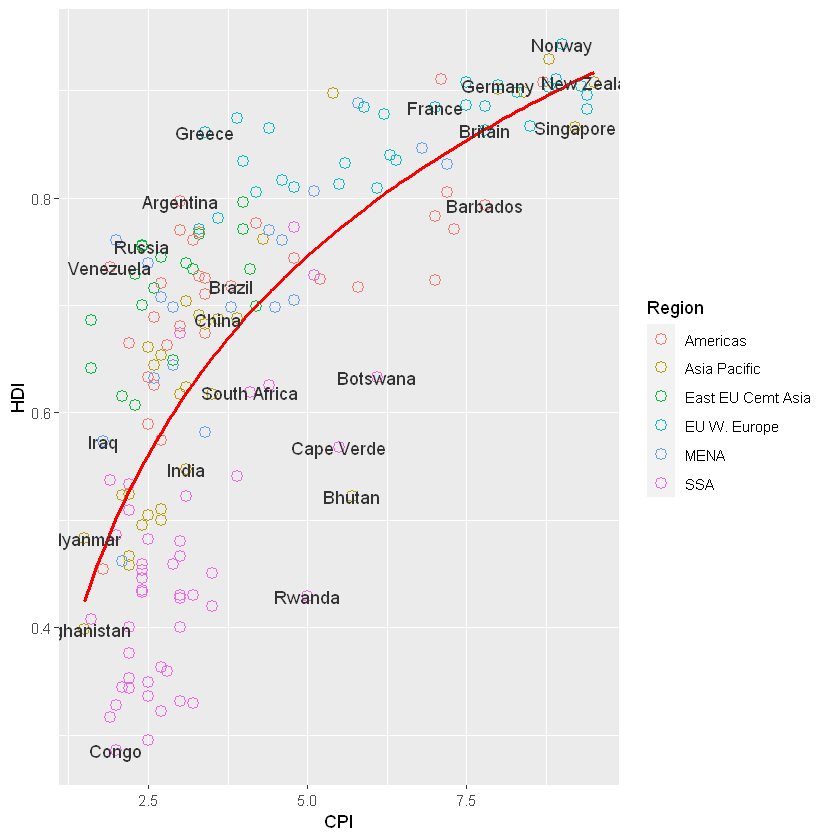

In [13]:
pointsToLabel <- c("Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Singapore")

pl3 <- pl2 + geom_text(aes(label = Country), color = "gray20", 
                data = subset(df, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

#### Almost there! Still not perfect, but good enough for this assignment. Later on we'll see why interactive plots are better for labeling. Now let's just add some labels and a theme, set the x and y scales and we're done!

#### Add theme_bw() to your plot and save this to pl4

In [14]:
pl4 <- pl3 + theme_bw()

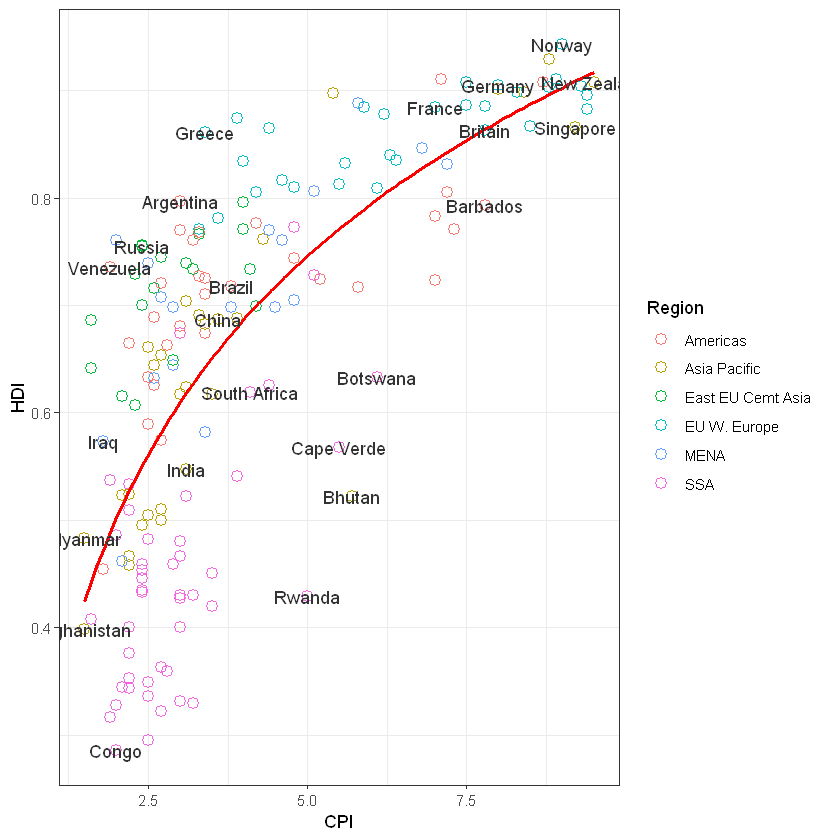

In [15]:
pl4

#### Add scale_x_continuous() and set the following arguments:

- name = Same x axis as the Economist Plot
- limits = Pass a vector of appropriate x limits
- breaks = 1:10

In [26]:
pl5 <- pl4 + scale_x_continuous(name = "Corruption Perceptions Index, 2011 (10 = least corrupt)",
                                limits = c(1,10), breaks = 1:10)

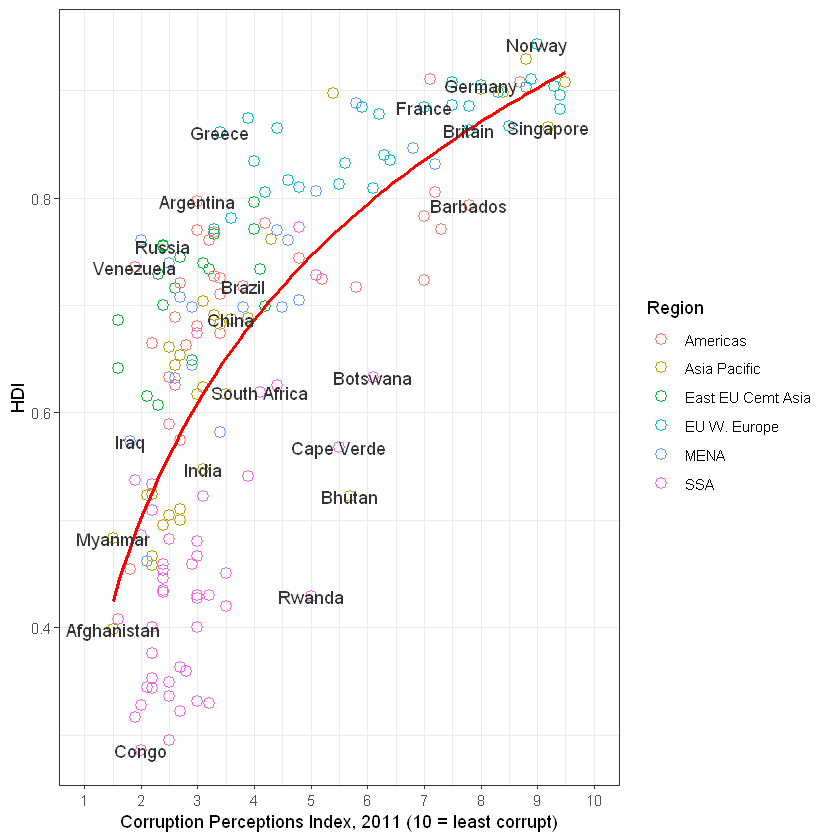

In [27]:
pl5

#### Now use scale_y_continuous to do similar operations to the y axis!

In [28]:
pl6 <- pl5 + scale_y_continuous(name = "Human Development Index, 2011 (1 = Best)",
                                limits = c(0.2, 1), breaks = seq(0.2, 1, 0.2))

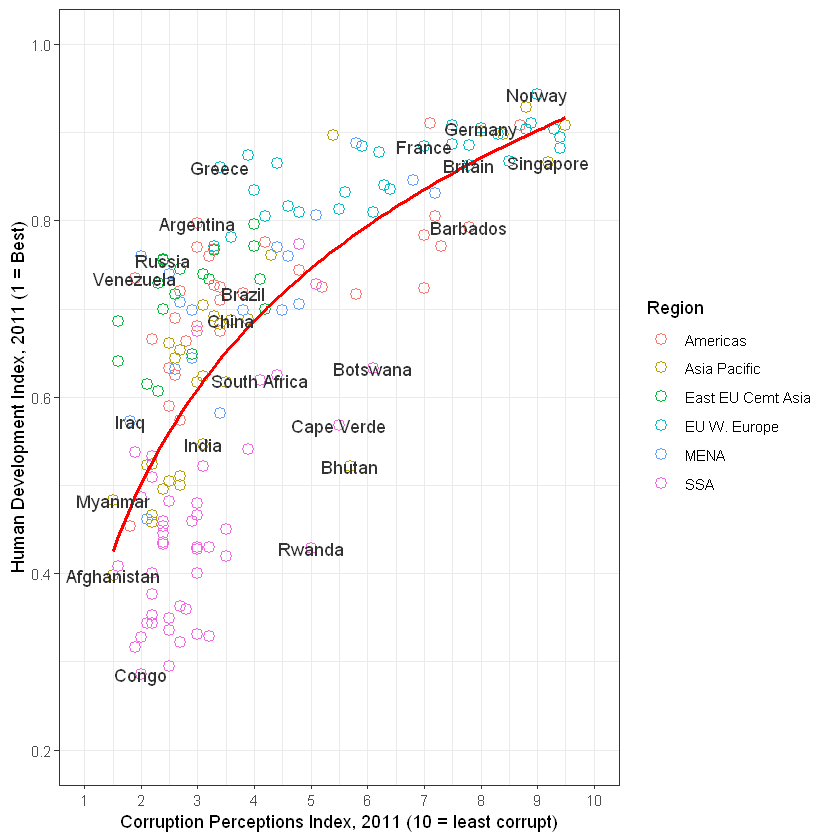

In [29]:
pl6

#### Finally use ggtitle() to add a string as a title.

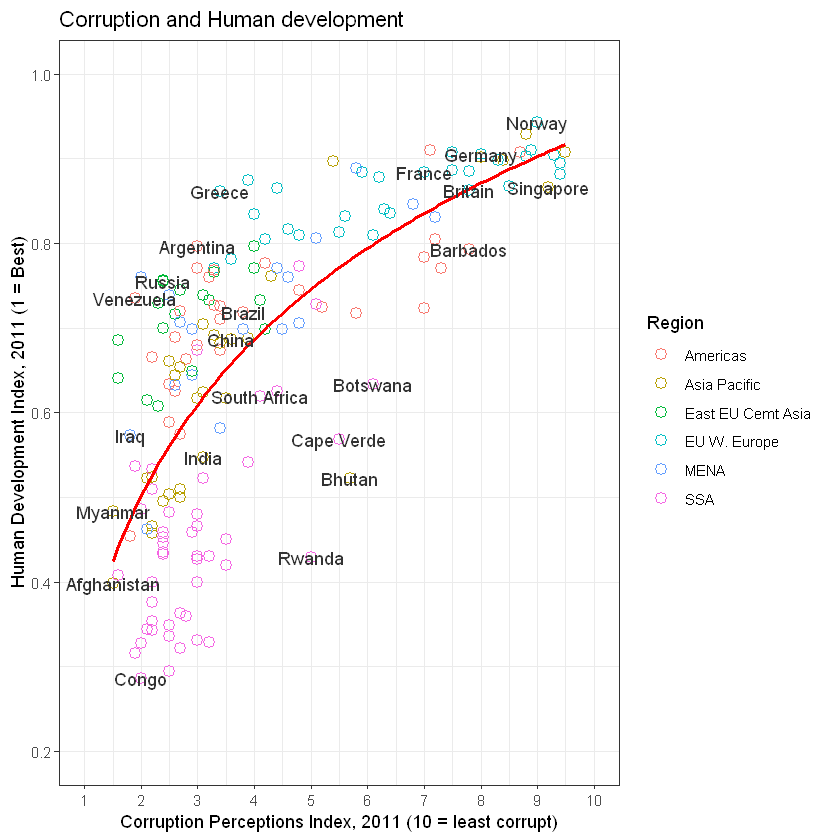

In [30]:
pl6 + ggtitle("Corruption and Human development")